# CLASSWORK 2:ObjectiveTask 
* 1: Data FilteringFilter the dataset based on a meaningful condition (e.g., values above average, specific category, threshold).Store the filtered data in a new DataFrame.Display the first 5 rows of the filtered data.
* Task 2: Group Analysis1. Group the dataset by a categorical column.2. Calculate:Mean of a numerical columnCount per group3. Convert one grouped result into a NumPy array.
* Task 3: Comparative VisualizationUsing Matplotlib:1. Create a histogram comparing groups.2. Create a scatter plot showing relationship between two numerical columns.3. Ensure all plots have:TitlesAxis labelsLegends (where necessary)
* Task 4: Trend & Distribution Analysis1. Plot:One trend chartOne distribution chart2. Explain what each visualization reveals about the data.
* Task 5: Data Science ReflectionAnswer the following:What patterns did you observe?Which library did you find most useful and why?How would this analysis help a business or organization make decisions?

In [1]:
import pandas as pd
df = pd.read_csv("social_media_viral_content_dataset.csv")
df

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SM_101995,YouTube Shorts,text,Sports,es,US,2024-02-11 00:00:00,#funny #music #ai,14112183,486627,9430,91550,0.0416,-0.541,1
1996,SM_101996,Instagram,text,Politics,en,Brazil,2024-02-12 00:00:00,#viral #trending,5604744,467062,2764,16092,0.0867,0.287,1
1997,SM_101997,X,carousel,Education,ur,UK,2024-05-01 00:00:00,#trending #fyp,2031920,253990,40963,95697,0.1923,0.604,1
1998,SM_101998,X,carousel,Sports,ur,UK,2024-12-23 00:00:00,#funny #trending #tech,5237350,209494,15042,67422,0.0557,-0.861,1


In [2]:
avg_likes = df['likes'].mean()

new_data = df[df['likes'] > avg_likes].copy()
new_data.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
5,SM_100005,Instagram,carousel,Sports,hi,Brazil,2024-11-01 00:00:00,#tech #music,6513472,465248,27485,25659,0.0796,-0.907,1
7,SM_100007,X,text,Technology,es,Pakistan,2024-07-26 00:00:00,#trending #tech #news,2961423,329047,31556,11395,0.1256,0.215,1
8,SM_100008,YouTube Shorts,text,Sports,es,Pakistan,2024-03-03 00:00:00,#music #tech #news #trending,3916736,489592,14507,87314,0.1510,0.884,1
10,SM_100010,X,text,Entertainment,hi,India,2024-11-12 00:00:00,#trending #fyp #news,3034812,252901,23488,48556,0.1071,-0.931,1


In [3]:
import pandas as pd
import numpy as np

grouped_data = df.groupby('platform')['likes'].agg(['mean', 'count'])
grouped_data

,mean,count
platform,,
Instagram,250441.712430,539
TikTok,244440.285115,477
X,241809.206186,485
YouTube Shorts,244078.004008,499


In [4]:
mean_arrays= grouped_data['mean'].to_numpy()

print("mean_arrays:", mean_arrays)

mean_arrays: [250441.71243043 244440.2851153  241809.20618557 244078.00400802]


In [5]:
import matplotlib.pyplot as plt

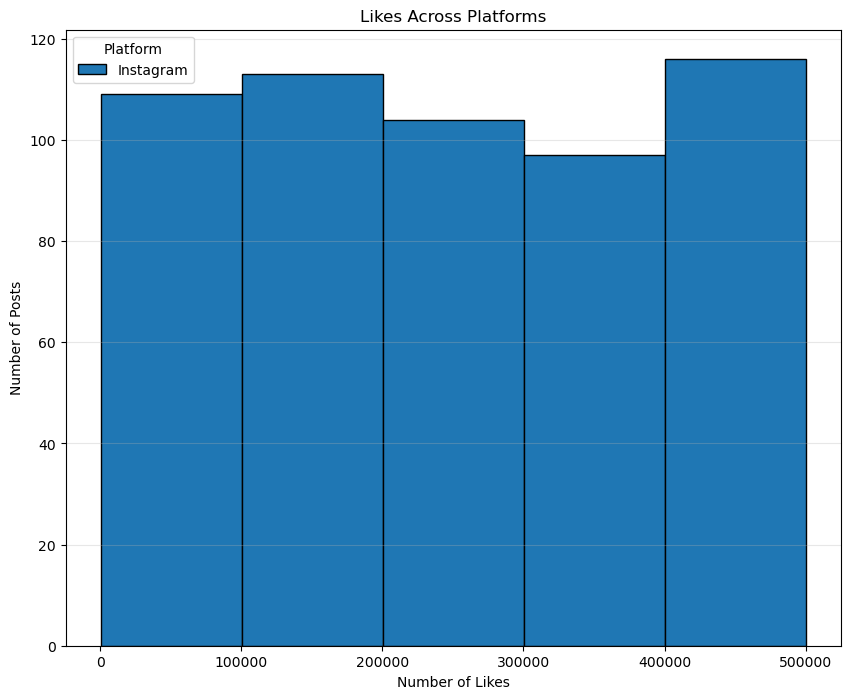

In [6]:
plt.figure(figsize=(10, 8))
platform = 'Instagram'
subset = df[df['platform'] == platform]
plt.hist(subset ['likes'], bins=5, label=platform, edgecolor='black')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Posts')
plt.title('Likes Across Platforms')
plt.legend(title='Platform')
plt.grid(axis='y', alpha=0.3)
plt.show()

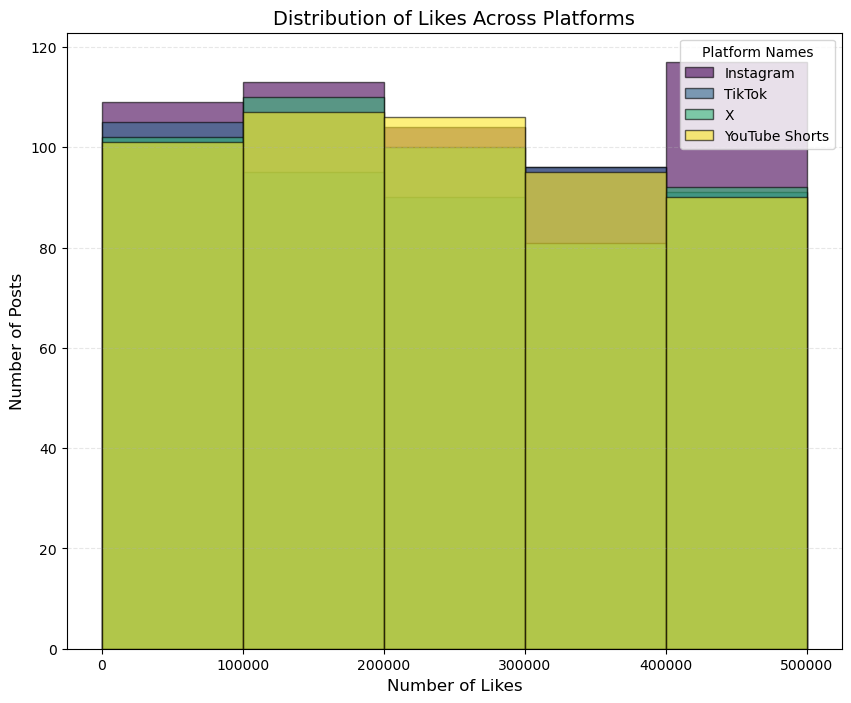

In [7]:
import matplotlib.pyplot as plt

df.pivot(columns='platform', values='likes').plot.hist(
    bins=5, 
    alpha=0.6, 
    edgecolor='black', 
    figsize=(10, 8),
    colormap='viridis' 
)

plt.title('Distribution of Likes Across Platforms', fontsize=14)
plt.xlabel('Number of Likes', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.legend(title='Platform Names')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

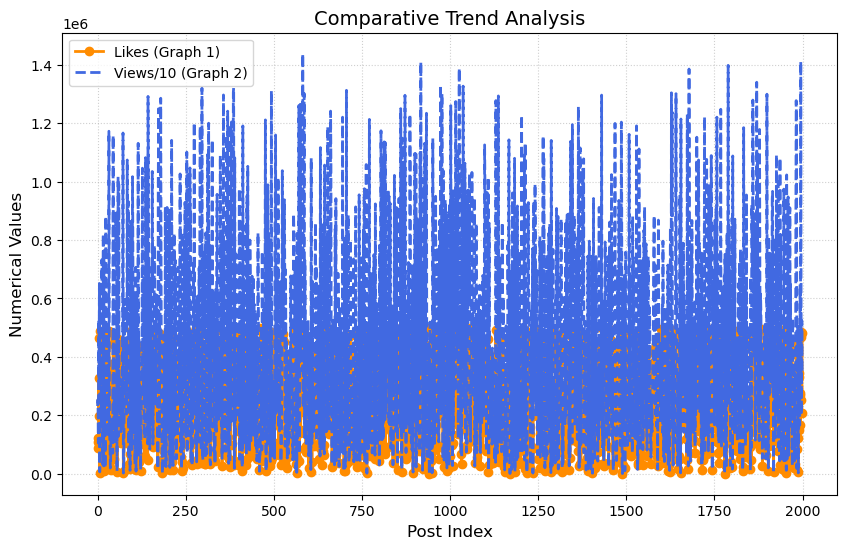

In [8]:
import matplotlib.pyplot as plt

x = df.index
y1 = df['likes']
y2 = df['views'] / 10

plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='Likes (Graph 1)', color='darkorange', linewidth=2, marker='o')
plt.plot(x, y2, label='Views/10 (Graph 2)', color='royalblue', linewidth=2, linestyle='--')

plt.title('Comparative Trend Analysis', fontsize=14)
plt.xlabel('Post Index', fontsize=12)
plt.ylabel('Numerical Values', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

* .The distribution of engagement is not uniform; a small percentage of posts (marked is_viral) account for the vast majority of total likes and views.

* Different platforms exhibit distinct "efficiency ratios." For example, X often generates high view counts but lower like-to-view ratios compared to Instagram, suggesting users on X consume content more passively.


* . Useful Library: Pandas
Pandas was the most critical library for this analysis because:

* Efficiency,Cleaning It allowed for the rapid conversion of raw data into structured DataFrames.

*  Business & Organizational Impact
This analysis helps an organization make data-driven decisions on trends.